# Stage 0: image enhancement

- histogram equalization
- high pass filter / medium pass filter / Gaussian filter
- 

# Stage 1:image segmentation

1\. manually segmentation

kinds:
- crop
- lasso
- polygon
- circle

2\. automatically segamentation

- Hough Circle
- Canny Edge Detection

3\. to label and store to a database
(index, break, coalescence, )

In [19]:
import numpy as np
import matplotlib.image as mpimg  # for reading in images
import os
import matplotlib.pyplot as plt
import cv2  # computer vision library

%matplotlib inline

Image dimensions: (800, 1072, 3)


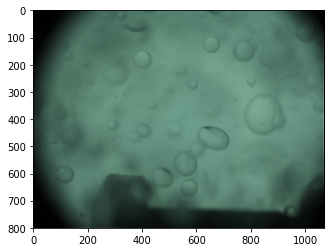

In [20]:
# Read in the image
# os.chdir('..')
# print(os.getcwd())
image = cv2.imread('data/600V350Q401/600V350Q401_0017.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make a copy of the image
image_copy = np.copy(image)

plt.imshow(image)
# Print out the image dimensions
print('Image dimensions:', image.shape)

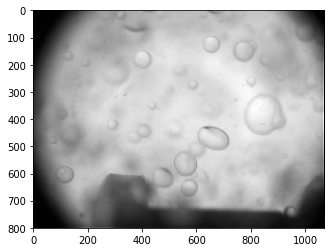

In [21]:
# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')

In [22]:
# To show the pixel grid, use matshow
# plt.matshow(tiny_image, cmap='gray')

In [24]:
# %matplotlib qt

# # Read in the image
# image = cv2.imread('C:/Users/Jerry/Desktop/111L15101_0006.jpg')

# # Make a copy of the image
# image_copy = np.copy(image)

# # Change color to RGB (from BGR)
# image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# plt.imshow(image)

### Plot color channels

### RGB channels 

Visualize the levels of each color channel. Pay close attention to the traffic signs!

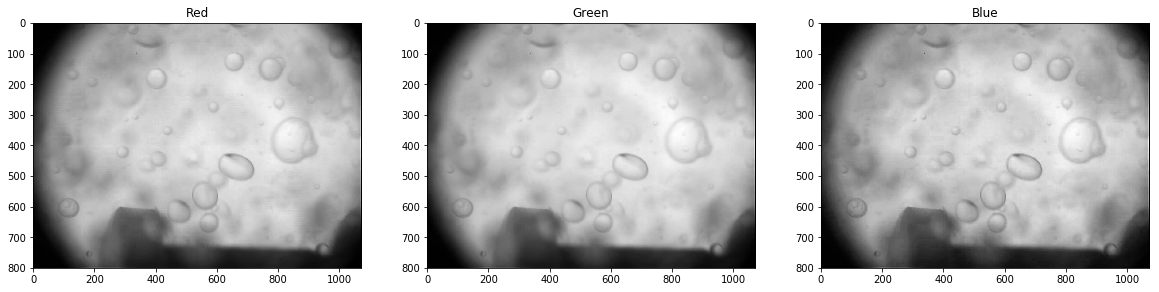

In [25]:
# RGB channels
# r = image[:,:,0]
# g = image[:,:,1]
# b = image[:,:,2]
b,g,r = cv2.split(image)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')


### HSV channels 

Visualize the levels of channels: hue, saturation, value. 

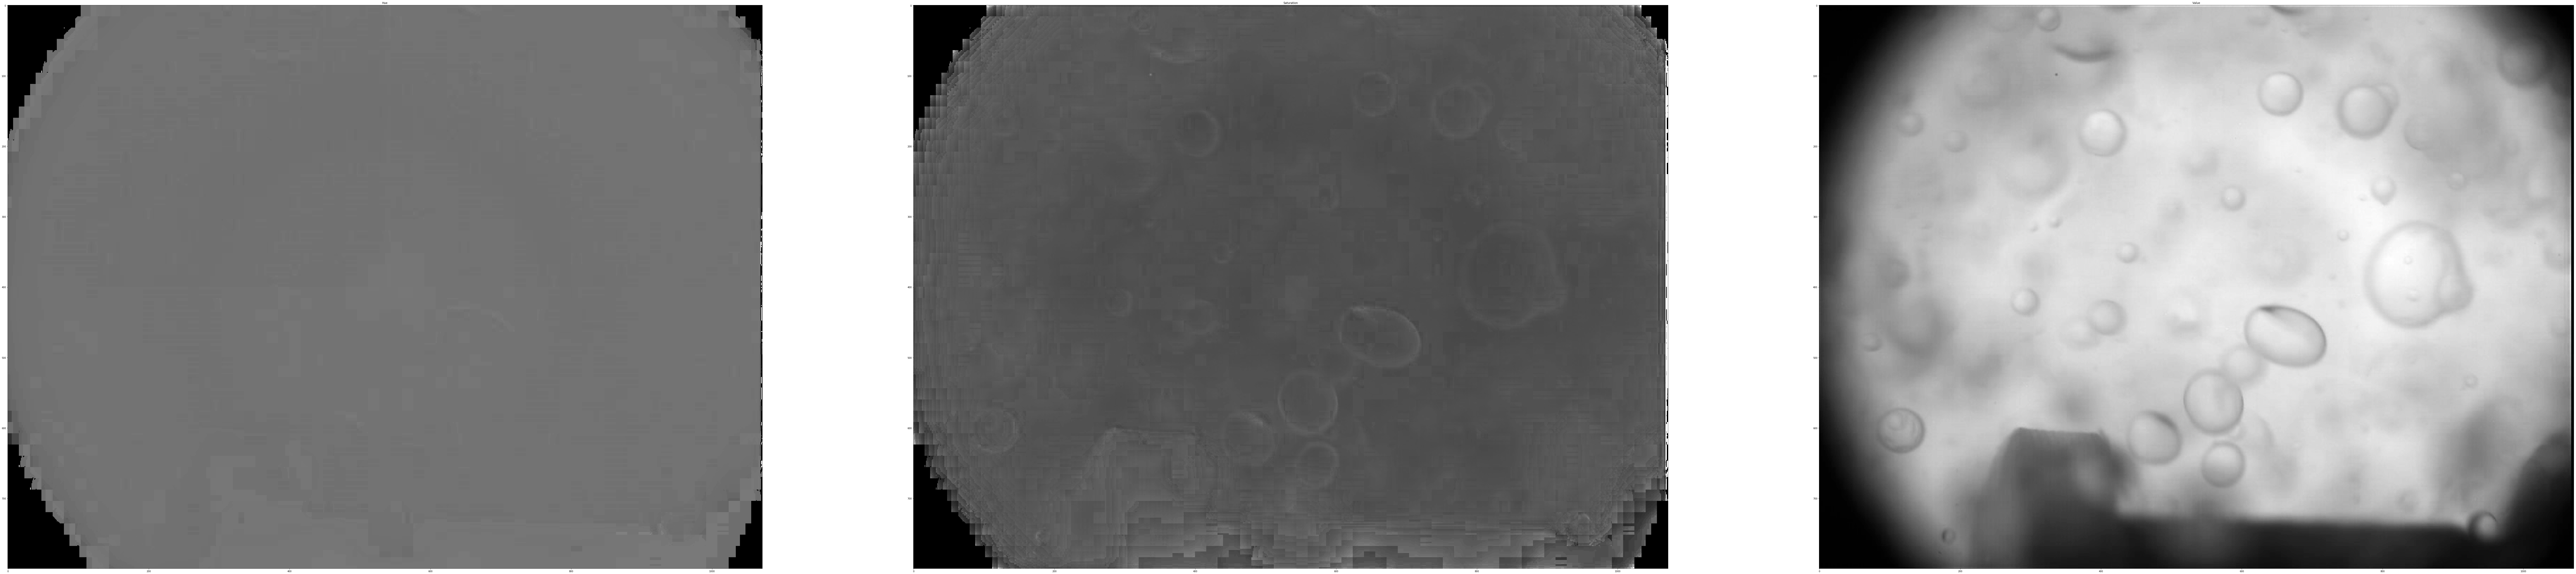

In [26]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
# h = hsv[:,:,0]
# s = hsv[:,:,1]
# v = hsv[:,:,2]
h,s,v = cv2.split(hsv)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(200,100))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')


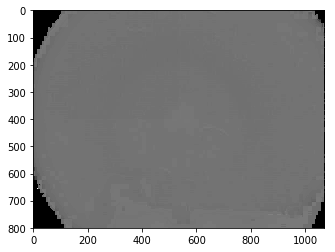

In [27]:
plt.imshow(h, cmap='gray')

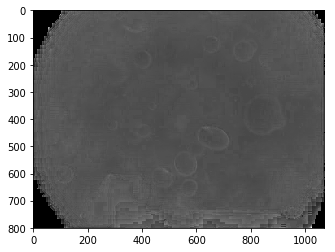

In [28]:
plt.imshow(s, cmap='gray')

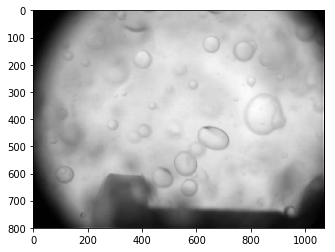

In [29]:
plt.imshow(v, cmap='gray')

In [30]:
cv2.imwrite("v_diff.jpg",v)

True

#### 1.1 色彩空间尝试小结
不同色彩空间的尝试，可以发现，该图像的颜色区分度并不大，即R、G、B三个通道的图像是大致相同的，说明特征信息与颜色无关；在HSV空间中，我们可以清楚地发现，H、S、V中图像差别非常大，而且可以发现基本所有的信息都保留在V通道中，即像素的强度是提取特征信息的关键。

### 1.2 均衡化尝试
均衡化是为了将图像的强度区别增强，充分利用0-255的强度区间
以下观察 直方图均一化方法 和 CLAHE(Contrast Limited Adaptive Histogram Equalization)均一化方法 的区别并记录

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]


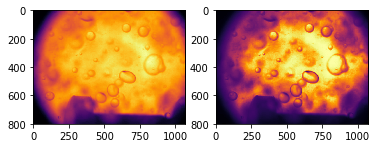

In [31]:
equ_v = cv2.equalizeHist(v)
print(v)
# res = np.hstack((v,equ_v)) #stacking images side-by-side
f,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(v,cmap='inferno')
ax2.imshow(equ_v,cmap='inferno')

In [32]:
cv2.imwrite('v.jpg',v)
cv2.imwrite('equ_v.jpg',equ_v)

True

In [33]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_v = clahe.apply(v)
cv2.imwrite('clahe_v.jpg',clahe_v)

True

#### 1.2 均衡化尝试小结
用不同的equalization的方法，可以得到equalization是必要的，边缘信息得到了相当大的增强，而且选用CLAHE算法对于保证实验数据真实性是必要的，比如上述图像中右侧，大液滴前的小液滴在直方图均衡化后消失了，这是全局化的equalization的弊端，所以必须采用相对处理的方法。

### 1.3 图像过滤
过滤是为了去除噪声
均值滤波器：不考虑
高斯滤波器：高通滤波，高效过滤高斯噪声，会模糊轮廓
中值滤波器：高通，高效过滤椒盐噪声，适用于图像质量很低的情况，会模糊轮廓，
Bilateral Filtering：高通，不会模糊轮廓，是基于高斯滤波器的，但是比上面的慢

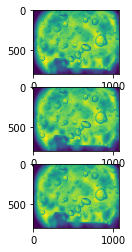

In [40]:
clahe_v

# 高斯滤波器：高通滤波，高效过滤高斯噪声，会模糊轮廓
blur = cv2.GaussianBlur(clahe_v,(5,5),0)

# 中值滤波器：高通，高效过滤椒盐噪声，适用于图像质量很低的情况，会模糊轮廓，
median = cv2.medianBlur(clahe_v,5)

# Bilateral Filtering
blur2 = cv2.bilateralFilter(clahe_v,9,75,75)

f,(ax1, ax2, ax3) = plt.subplots(3,1)
ax1.imshow(blur)
ax2.imshow(median)
ax3.imshow(blur2)

In [42]:
for file, filename in zip([blur, median, blur2],['blur', 'median', 'blur2']):
    cv2.imwrite(filename + '.jpg', file)

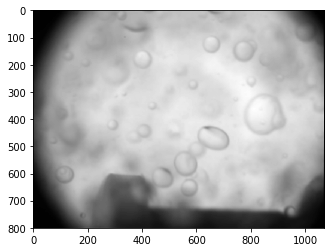

In [29]:
filtered_v = cv2.bilateralFilter(v,9,75,75)
plt.imshow(filtered_v, cmap='gray')

#### 1.3 滤波器
好像高斯滤波器更加合适，这一步不是必须的。可以考虑到Canny的算法设计

### 1.4 Canny边缘检测


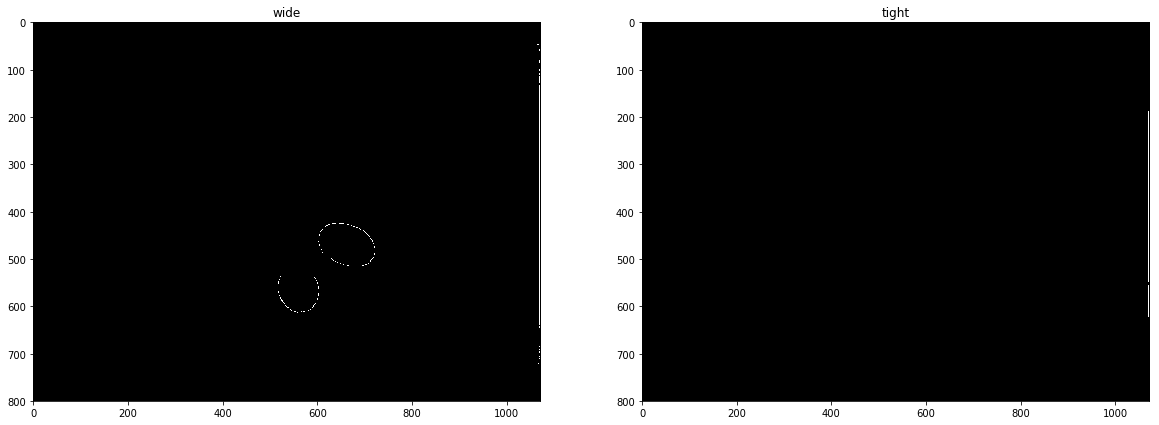

In [61]:
inv = 255 - blur

# Try Canny using "wide" and "tight" thresholds

wide = cv2.Canny(inv, 10, 230)
tight = cv2.Canny(inv, 200, 250)
 
    
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

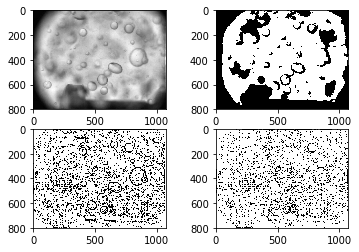

In [73]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

# retval, binary_image = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY)

# plt.imshow(binary_image, cmap='gray')
ret,th1 = cv2.threshold(clahe_v,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(clahe_v,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(clahe_v,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
for file, filename, ax in zip([clahe_v, th1, th2, th3],
                          ['Original Image', 
                           'Global Thresholding (v = 127)', \
                           'Adaptive Mean Thresholding', 
                           'Adaptive Gaussian Thresholding'],
                          [ax1, ax2, ax3, ax4]):
    ax.imshow(file,'gray')
    cv2.imwrite(filename+'.jpg', file)

# for i in xrange(4):
#     plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
# plt.show()

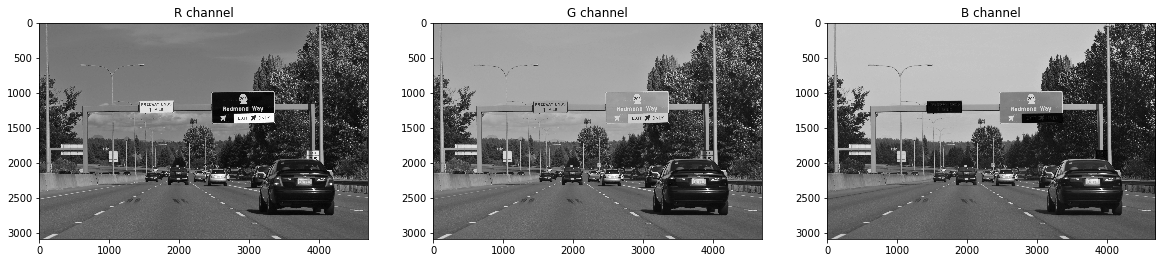

In [6]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

## Which area has the lowest value for red? What about for blue?

### Define pink and hue selection thresholds

In [ ]:
# Define our color selection criteria in HSV values
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])


In [ ]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

## filter
Sobel: high pass
Gaussian: low pass

In [ ]:
# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx

In [ ]:
# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

plt.imshow(gray_blur, cmap='gray')

In [ ]:
## Canny edge detection

In [ ]:
# Try Canny using "wide" and "tight" thresholds

wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)
 
    
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

### HoughCircles function

`HoughCircles` takes in a few things as its arguments:
* an input image, detection method (Hough gradient), resolution factor between the detection and image (1),
* minDist - the minimum distance between circles
* param1 - the higher value for performing Canny edge detection
* param2 - threshold for circle detection, a smaller value --> more circles will be detected
* min/max radius for detected circles

The variable you should change will be the last two: min/max radius for detected circles. Take a look at the image above and estimate how many pixels the average circle is in diameter; use this estimate to provide values for min/max arguments. You may also want to see what happens if you change minDist.

In [4]:
# for drawing circles on
circles_im = np.copy(image)

## TODO: use HoughCircles to detect circles
# right now there are too many, large circles being detected
# try changing the value of maxRadius, minRadius, and minDist
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                           minDist=45,
                           param1=200,
                           param2=100,
                           minRadius=20,
                           maxRadius=40)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

print('Circles shape: ', circles.shape)
    

AttributeError: 'NoneType' object has no attribute 'rint'

## Gaussian Blur

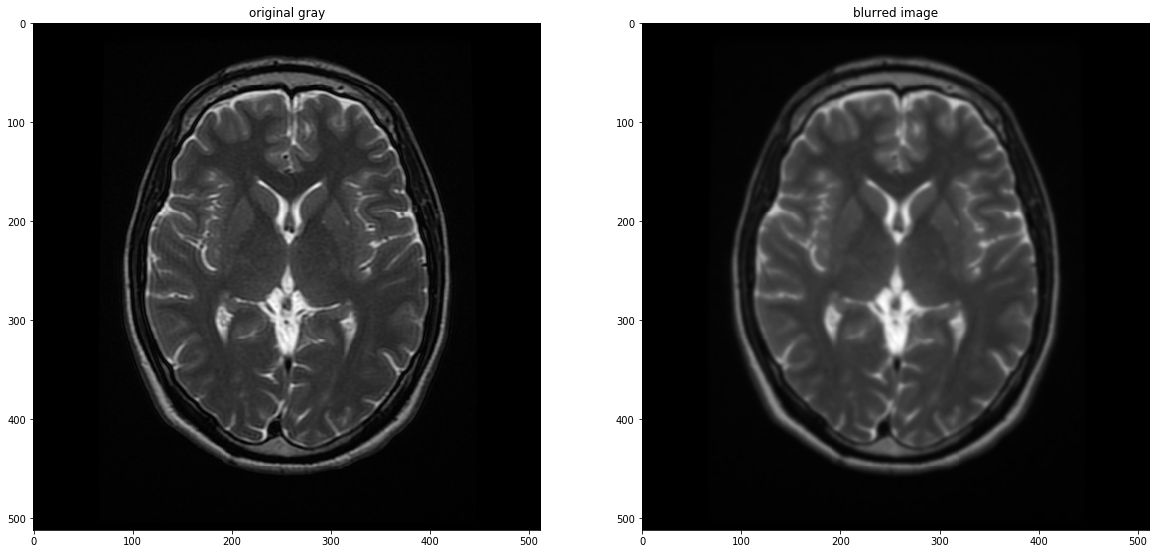

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(gray_blur, cmap='gray')

### Test performance with a high-pass filter

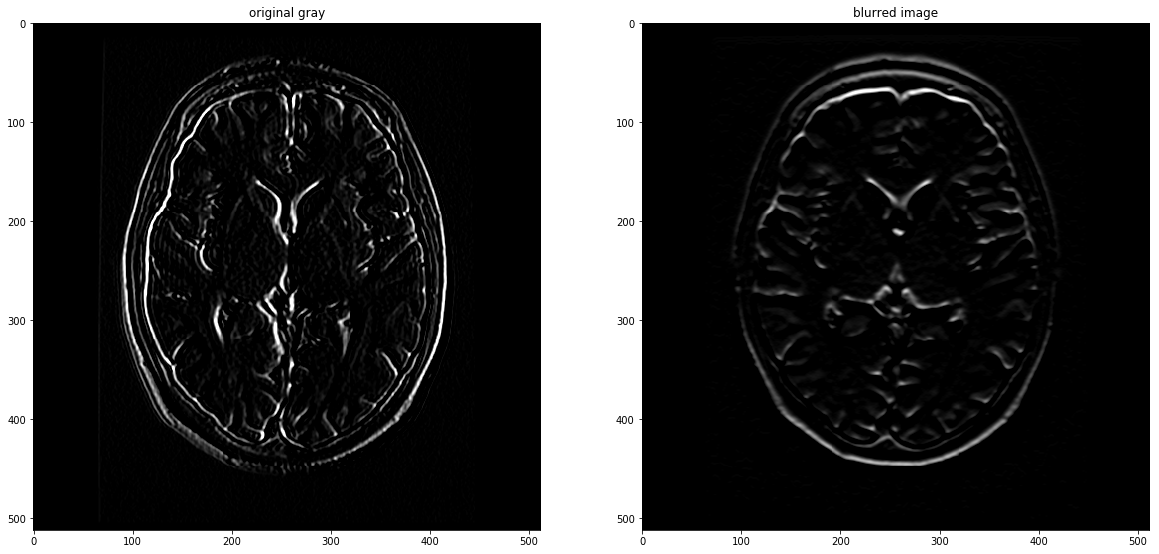

In [3]:
# High-pass filter 

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

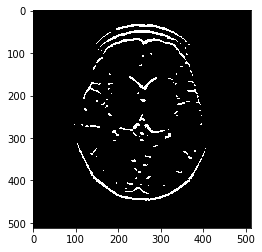

In [4]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')


## get ROI
Crop, lasso, polygon  

### Mask the image 

In [ ]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

In [ ]:
# Define the masked area in RGB space
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

In [ ]:
# Now try HSV!

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)